# Week 4: BBC News Classification

## Part 1: Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?

Please feel free to look at online resources on processing raw texts to feature vectors. Many methods process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a method and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words. Also, do exploratory data analysis such as word statistics and/or visualization.

As we did not learn natural language processing (NLP) specific techniques such as word embeddings in the lectures, we recommend reading discussions and example codes from others in the Kaggle and/or doing some research online to make sure you understand. You can refer to any resource as needed, but make sure you “demonstrate” your understanding- please include explaining in your own words, discussions, and your interpretation. Also importantly, please have a reference list at the end of the report.

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# load data
train_x = pd.read_csv('BBC News Train.csv')
test_x = pd.read_csv('BBC News Test.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# inspect both sets of data
print("Training Set:")
train_x.info()
train_x.head()
print("--------------------------------------------")
print("\n Test Set:")
test_x.info()
test_x.head()

Training Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
--------------------------------------------

 Test Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


**Explanation**

Predicting the category of the news articles requires working with the text classification data above. To perform NLP, the original data needs to be converted to lowercase to clean
for any data inconsistency.

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean(article):
  tokens = nltk.word_tokenize(article.lower())
  lem_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
  return lem_tokens

**Explanation**

Now that the text column has been cleaned, a preliminary analysis will be performed on the word statistics will be conducted, to inspect the distribution of words across each type of news category. The results will be communicated using a bar graph visualization.

In [49]:
# add cleaned text to the data
train_x['Text_Clean'] = train_x['Text'].apply(clean)

# get counts to plot histogram
word_freq_by_category = {}
for cat in train_x['Category'].unique():
  print(cat)
  words = sum(train_x[train_x['Category'] == cat]['Text_Clean'], [])
  print(words)
  word_freq_by_category[cat] = pd.Series(words).value_counts()

business
['worldcom', 'launch', 'defence', 'lawyer', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charge', 'called', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper', 'worldcom', 'internal', 'accounting', 'alerted', 'director', 'irregular', 'accounting', 'practice', 'u', 'telecom', 'giant', 'warning', 'led', 'collapse', 'firm', 'following', 'discovery', 'accounting', 'fraud', 'mr', 'ebbers', 'pleaded', 'guilty', 'charge', 'fraud', 'conspiracy', 'prosecution', 'lawyer', 'argued', 'mr', 'ebbers', 'orchestrated', 'series', 'accounting', 'trick', 'worldcom', 'ordering', 'employee', 'hide', 'expense', 'inflate', 'revenue', 'meet', 'wall', 'street', 'earnings', 'estimate', 'm', 'cooper', 'run', 'consulting', 'business', 'told', 'jury', 'new', 'york', 'wednesday', 'external', 'auditor', 'arthur', 'andersen', 'approved', 'worldcom', 'accounting', 'early', 'said', 'andersen', 'given', 'green', 'light', 'procedure', 'practice', 'used', '

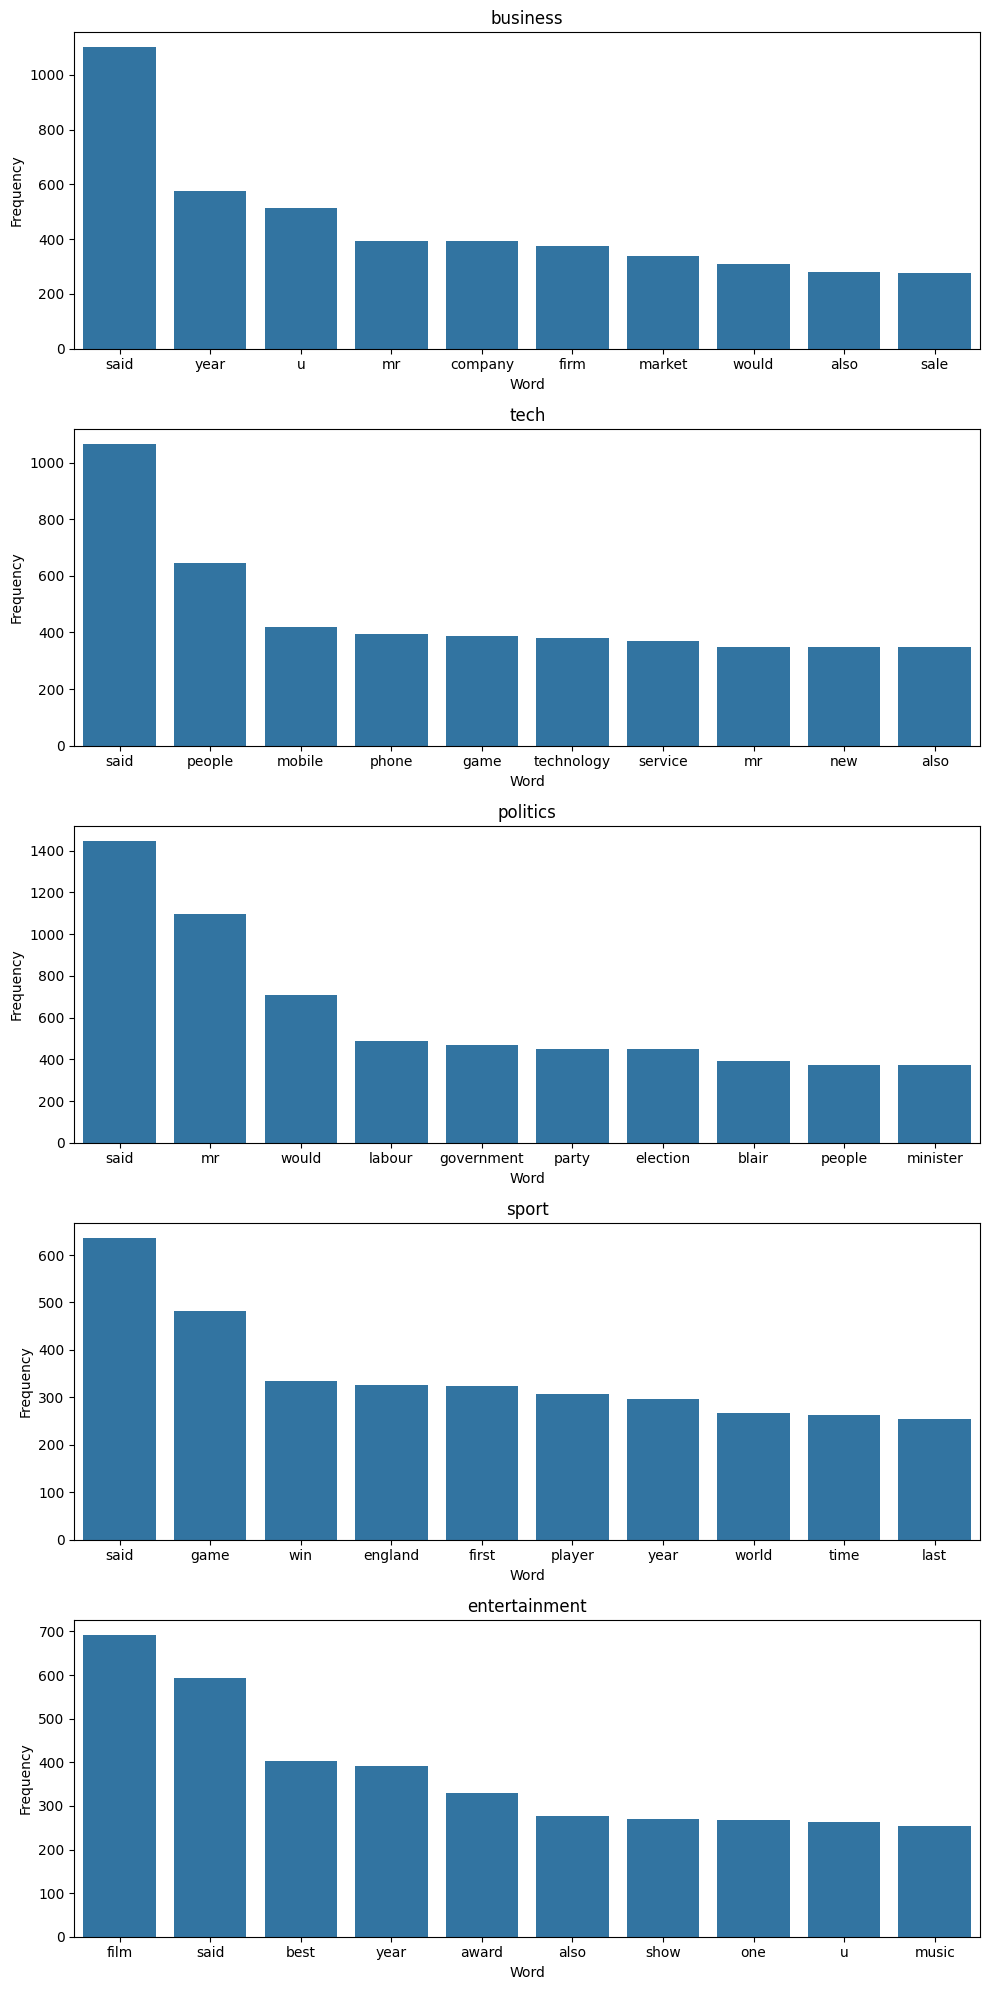

In [48]:
fig, axes = plt.subplots(len(train_x['Category'].unique()), 1, figsize=(10, 20))
train_cat = train_x['Category'].unique()
for i in range(len(train_cat)):
  # limit to top 10 words due to run time
  df = pd.DataFrame({'value': word_freq_by_category[train_cat[i]][:10].values,
                     'variable': word_freq_by_category[train_cat[i]][:10].index})
  sns.barplot(x='variable', y='value', data=df, ax=axes[i])
  axes[i].set_title(train_cat[i])
  axes[i].set_ylabel('Frequency')
  axes[i].set_xlabel('Word')
plt.tight_layout()
plt.show()

**Observations**

Between the top 10 frequent words in each category, there are some similarities and differences amongst them. The word "said" appears as either the first or second most frequent word amongst all 5 categories, which suggests that it may not be as useful when categorizing the articles.

In each category, there appears to be mutliple common words that relate to its subject. For example:


*   In "business" category, top 10 frequent, subject-related words include: "company", "firm", and "market"
*   In "tech" category, top 10 frequent, subject-related words include: "mobile", "technology"
*   In "politics" category, top 10 frequent, subject-related words include: "government", "election"
*   In "sport" category, top 10 frequent, subject-related words include: "game", "player"
*   In "entertainment" category, top 10 frequent, subject-related words include: "film", "award"



**Explanation**

To process the data into word embeddings, I have chosen to use the **TF-IDF method**. The way this method works is it processes an input of a collection of raw text and produces a sparse representation of a matrix of the counts of tokens in the text. It then transforms the matrix of counts into a "term-frequency times inversion document-frequency" (TF-IDF)representation. This weighting method scales down the immpact of frequent tokens that commonly occur in any body of text, as they are less useful in classifying the text due to its common occurence across all kinds of text. The method returns the normalized TF-IDF representation matrix as its output.

In [61]:
clean_text = train_x['Text_Clean'].apply(lambda x: ' '.join(map(str, x))) # concatenate vector of words in each article into one string for processing

In [62]:
# print(clean_text)

0       worldcom launch defence lawyer defending forme...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss payout eighteen former enron direct...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text_Clean, Length: 1490, dtype: object


In [64]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean_text)

# dataframe of TF-IDF matrix values, mapped to the text features
tfidf_features = vectorizer.get_feature_names_out()
train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features,
                        index=[f"Document {i + 1}" for i in range(len(clean_text))])

# inspect TF-IDF matrix
train_tfidf_df.info()
train_tfidf_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, Document 1 to Document 1490
Columns: 20463 entries, aa to zvonareva
dtypes: float64(20463)
memory usage: 232.6+ MB


,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,abandon,...,zombie,zone,zonealarm,zoom,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
Document 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 2: Building and training models. [35 pts]


In the Kaggle competition, the training data has labels (category). Thus, it can be solved using supervised learning. In general, the more labeled data we have, the more accurate the supervised learning model will be. But unsupervised learning can be powerful even when there is a small number of labels or no labels. This assignment will apply an unsupervised approach, especially the matrix factorization method, to discover topics in the news articles and use the labels to check the accuracy.

Here are some steps to guide this section:
1) Think about this and answer: when you train the unsupervised model for matrix factorization, should you include texts (word features) from the test dataset or not as the input matrix? Why or why not?

**Answer**:
When training, the text from the test dataset should not be included because the test dataset is only used to validate the model. The model should not have seen the text during training because then unsupervised model will have seen the data already and have bias. This would mean the validation performed later would not be valid.

2) Build a model using the matrix factorization method(s) and predict the train and test data labels. Choose any hyperparameter (e.g., number of word features) to begin with.


In [87]:
import itertools
from itertools import permutations
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def label_permute_compare(ytdf, yp):
    # Helper function to calculate best mapping of values to labels
    # returns the best label assignment, accuracy score, and confusion matrix
    all_acc_by_perm = []

    labels = ytdf.unique().tolist()
    all_perm = permutations(range(len(labels)))
    for perm_ in all_perm:
        res = ytdf.map(dict(zip(labels, perm_)))
        accuracy = accuracy_score(res, yp)
        all_acc_by_perm.append([accuracy, perm_])

    max_accuracy, best_perm = max(all_acc_by_perm, key=lambda x: x[0])
    best_mapping = dict(zip(labels, best_perm))

    best_label = [label for label,_ in sorted(best_mapping.items(),
                                            key=lambda x: x[1])]

    print("\t The accuracy score was: ", max_accuracy)

    return(best_label, max_accuracy, confusion_matrix(ytdf.map(best_mapping), yp))

In [126]:
nmf_model = NMF(n_components=len(train_cat),
                random_state=0)

NMF stands for non-negative matrix factorization. This is used to extract the key features by determining non-negative matrices W, H, where W*H is approximately the input non-negative matrix. It decomposes X into non-negative factor matrices W and H.

3) Measure the performances on predictions from both train and test datasets. You can use accuracy, confusion matrix, etc., to inspect the performance. You can get accuracy for the test data by submitting the result to Kaggle.


In [127]:
# predict on training data
W = nmf_model.fit_transform(tfidf_matrix)

best_res, max_accuracy, cm = label_permute_compare(
    train_x['Category'],
    np.argmax(W, axis=1)
)

	 The accuracy score was:  0.9147651006711409


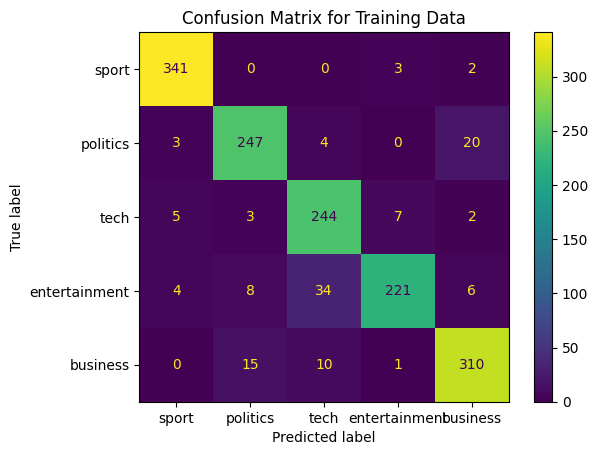

In [128]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=best_res)
disp.plot()

plt.title("Confusion Matrix for Training Data")
plt.show()

4) Change hyperparameter(s) and record the results. We recommend including a summary table and/or graphs.
5) Improve the model performance if you can- some ideas may include but are not limited to; using different feature extraction methods, fit models in different subsets of data, ensemble the model prediction results, etc.

In [122]:
# hyperparameter options for NMF model
init_options = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
solver_options = ['cd', 'mu']
beta_loss_options = ['frobenius', 'kullback-leibler', 'itakura-saito']

final_best_init_ = None
final_best_solver_ = None
final_best_beta_loss_ = None
final_best_labels = None
final_best_cm = None
final_best_model = None
final_best_accuracy_ = 0

print("Testing different hyperparamenters for NMF model")
print("--------------------------------------------------")
print("   init    | solver  |    beta loss     | model accuracy")
print("--------------------------------------------------")
for init_ in init_options:
  for solver_ in solver_options:
    for beta_loss_ in beta_loss_options:
      try:
        model = NMF(n_components=len(train_cat), init=init_, solver=solver_, beta_loss=beta_loss_, random_state=0)
        W = model.fit_transform(tfidf_matrix)

        labels, acc, cm = label_permute_compare(
            train_x['Category'],
            np.argmax(W, axis=1)
        )
        print(f"{init_:<10}", "| ", f"{solver_:<6}", "| ", f"{beta_loss_:<12}", "| ", acc)
        if acc > final_best_accuracy_:
          final_best_accuracy_ = acc
          final_best_init_ = init_
          final_best_solver_ = solver_
          final_best_beta_loss_ = beta_loss_
          final_best_cm = cm
          final_best_labels = labels
          final_best_model = model
      except:
        print("(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)")

Testing different hyperparamenters for NMF model
--------------------------------------------------
   init    | solver  |    beta loss     | model accuracy
--------------------------------------------------
	 The accuracy score was:  0.8966442953020134
random     |  cd     |  frobenius    |  0.8966442953020134
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
	 The accuracy score was:  0.9040268456375838
random     |  mu     |  frobenius    |  0.9040268456375838
	 The accuracy score was:  0.5805369127516778
random     |  mu     |  kullback-leibler |  0.5805369127516778
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
	 The accuracy score was:  0.9147651006711409
nndsvd     |  cd     |  frobenius    |  0.9147651006711409
(Skipping hyperparameter option combination as solver cannot be used on this beta loss ty

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1595: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


	 The accuracy score was:  0.8557046979865772
nndsvd     |  mu     |  frobenius    |  0.8557046979865772


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1595: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


	 The accuracy score was:  0.9288590604026845
nndsvd     |  mu     |  kullback-leibler |  0.9288590604026845
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1595: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


	 The accuracy score was:  0.9147651006711409
nndsvda    |  cd     |  frobenius    |  0.9147651006711409
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
	 The accuracy score was:  0.9080536912751678
nndsvda    |  mu     |  frobenius    |  0.9080536912751678
	 The accuracy score was:  0.938255033557047
nndsvda    |  mu     |  kullback-leibler |  0.938255033557047
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
	 The accuracy score was:  0.9147651006711409
nndsvdar   |  cd     |  frobenius    |  0.9147651006711409
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
(Skipping hyperparameter option combination as solver cannot be used on this beta loss type)
	 The accuracy score was:  0.9093959731543624
nndsvdar   |  mu     |  frobenius    |  0.9093959731543624
	 The ac

The best model hyperparameters are:  nndsvdar mu kullback-leibler  with acc  0.9416107382550336
	 The accuracy score was:  0.9409395973154362


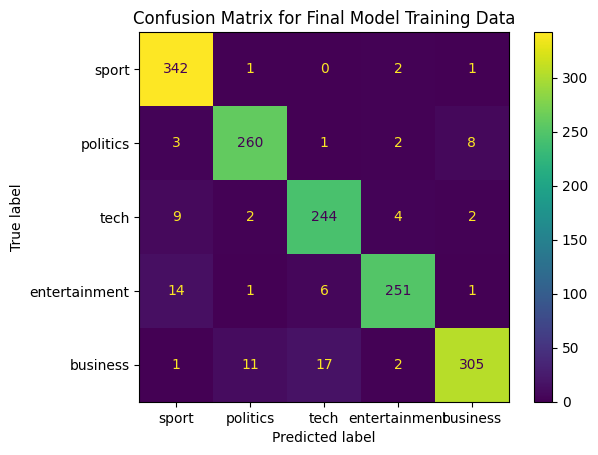

In [150]:
print("The best model hyperparameters are: ", final_best_init_, final_best_solver_, final_best_beta_loss_, " with acc ", final_best_accuracy_)
final_best_model = NMF(n_components=5, random_state=0,
                       init='nndsvdar', solver='mu',
                       beta_loss='kullback-leibler')
final_best_model.fit(tfidf_matrix)
train_pred = final_best_model.transform(tfidf_matrix).argmax(axis=1)

final_best_labels, final_best_acc, final_best_cm = label_permute_compare(
            train_x['Category'],
            train_pred
        )

disp = ConfusionMatrixDisplay(confusion_matrix = final_best_cm, display_labels=final_best_labels)
disp.plot()

plt.title("Confusion Matrix for Final Model Training Data")
plt.show()

In [151]:
# predict on test data
test_x['Text_Clean'] = test_x['Text'].apply(clean)
test_x_clean = test_x['Text_Clean'].apply(lambda x: ' '.join(x)) # clean test data first

tfidf_matrix_test = vectorizer.transform(test_x_clean) # create matrix word embedding without fitting, since this is test data
y_pred = final_best_model.transform(tfidf_matrix_test).argmax(axis=1)

test_x['Category'] = [final_best_labels[i] for i in y_pred]

In [152]:
test_x[['ArticleId', 'Category']].to_csv('submit.csv', index=False) # file for submission to Kaggle

**Measuring Performance on Test Data**

The resulting accuracy on test data is : 0.95374

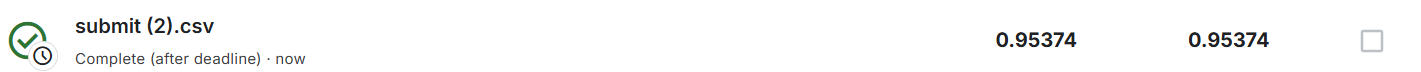

## Part 3: Compare with supervised learning [30 pts]

Use the following steps to guide your work:

1) Pick and train a supervised learning method(s) and compare the results (train and test performance)

Selecting the **SVM** model as the supervised learning method.

SVM model with training size 0.8 has accuracy of  0.9798657718120806


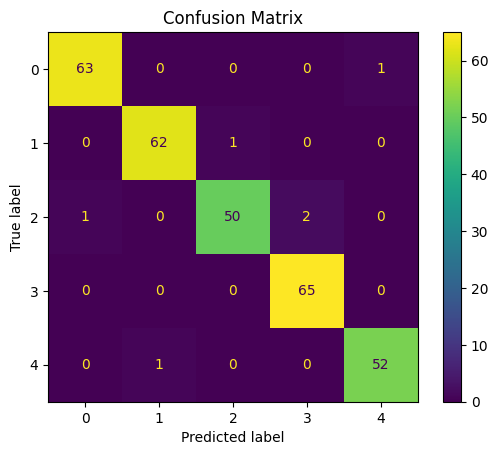

In [153]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm_model = SVC(kernel='linear', C=1, random_state=0)

# split train data into training and validation
x_train, x_val, y_train, y_val = train_test_split(tfidf_matrix,
                                                  train_x['Category'],
                                                  train_size=0.8,
                                                  random_state=0)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_val)

print("SVM model with training size 0.8 has accuracy of ", accuracy_score(y_val, svm_pred))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, svm_pred)).plot()
plt.title("Confusion Matrix")
plt.show()

In [154]:
svm_y_pred = svm_model.predict(tfidf_matrix_test)
test_x['Category'] = svm_y_pred

# file for submission to Kaggle
test_x[['ArticleId', 'Category']].to_csv('submit_svm.csv', index=False)

**Measuring Supervised Learning Model Performance on Test Data**

The SVM model achieved an accuracy of 0.98231 on test data.
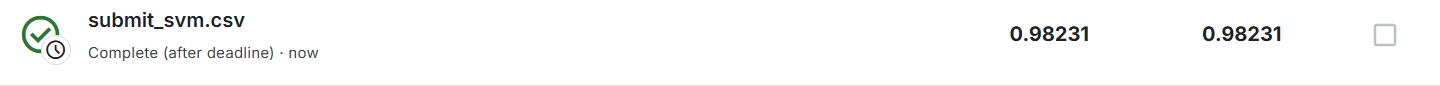

Selecting **KNN** as the training method.

KNN model with training size 0.8 has accuracy of  0.9194630872483222


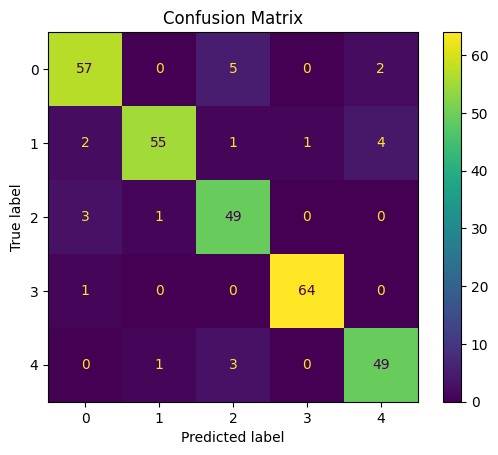

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_val)

print("KNN model with training size 0.8 has accuracy of ", accuracy_score(y_val, knn_pred))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, knn_pred)).plot()
plt.title("Confusion Matrix")
plt.show()

In [156]:
knn_y_pred = knn_model.predict(tfidf_matrix_test)
test_x['Category'] = knn_y_pred

# file for submission to Kaggle
test_x[['ArticleId', 'Category']].to_csv('submit_knn.csv', index=False)

**Measuring Supervised Learning Model Performance on Test Data**

The KNN model achieved an accuracy of 0.93605 on test data.
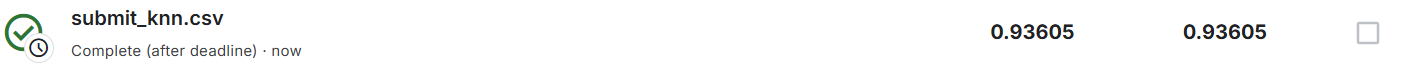

Comparing the two Supervised Learning models, it is evident that the SVM model performs better on both training and test data, as the accuracy scores are higher than KNN.

2) Discuss comparison with the unsupervised approach. You may try changing the train data size (e.g., Include only 10%, 20%, 50% of labels, and observe train/test performance changes). Which methods are data-efficient (require a smaller amount of data to achieve similar results)? What about overfitting?

In [163]:
# Compare SVM and NMF models when only 10% of labels are included in the training data size
x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(tfidf_matrix, train_x['Category'],
                                    train_size=0.1,
                                    stratify=train_x['Category'],
                                    random_state=0)


	 The accuracy score was:  0.8120805369127517


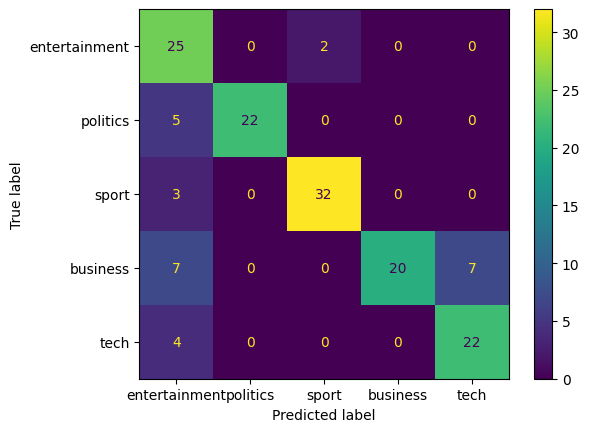

In [164]:
# NMF Unsupervised Learning Model
nmf_small = NMF(n_components=5, random_state=0,
                       init='nndsvdar', solver='mu',
                       beta_loss='kullback-leibler')
nmf_small.fit(x_train_s)
nmf_small_t_pred = nmf_small.transform(x_train_s).argmax(axis=1)

nmf_s_best_labels, nmf_s_best_acc, nmf_s_best_cm = label_permute_compare(
            y_train_s,
            nmf_small_t_pred
        )

disp = ConfusionMatrixDisplay(confusion_matrix = nmf_s_best_cm, display_labels=nmf_s_best_labels)
disp.plot()

In [168]:
# predict on test data
nmf_s_y_pred = nmf_small.transform(tfidf_matrix_test).argmax(axis=1)

test_x['Category'] = [nmf_s_best_labels[i] for i in nmf_s_y_pred]
test_x[['ArticleId', 'Category']].to_csv('submit_nmf_small.csv', index=False) # file for submission to Kaggle

The NMF model trained on 10% of the training data achieved an accuracy of 0.87482 on the test data.
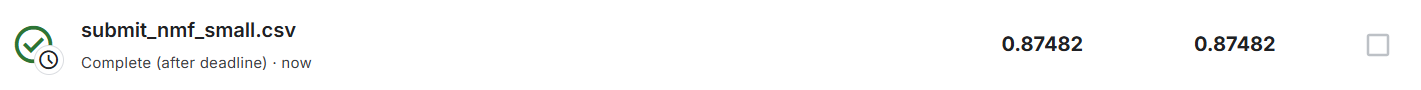

SVM model with training size 0.1 has accuracy of  0.9381058911260254


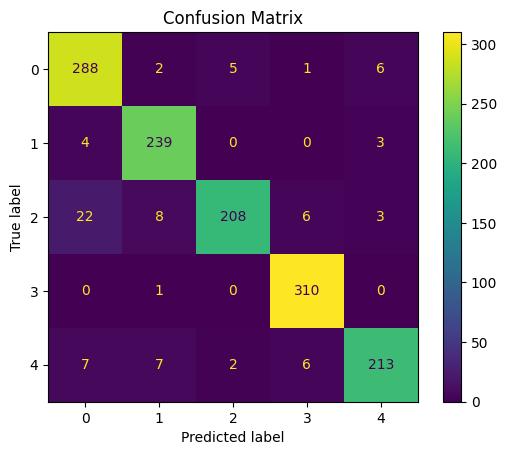

In [166]:
# SVM Supervised Learning Model
svm_small = SVC(kernel='linear', C=1, random_state=0)
svm_small.fit(x_train_s, y_train_s)

svm_pred_s = svm_small.predict(x_val_s)
print("SVM model with training size 0.1 has accuracy of ", accuracy_score(y_val_s, svm_pred_s))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val_s, svm_pred_s)).plot()
plt.title("Confusion Matrix")
plt.show()

In [167]:
svm_y_pred_s = svm_small.predict(tfidf_matrix_test)
test_x['Category'] = svm_y_pred_s

# file for submission to Kaggle
test_x[['ArticleId', 'Category']].to_csv('submit_svm_small.csv', index=False)

The SVM model trained on 10% of the training data has accuracy of 0.94285 on the training data.
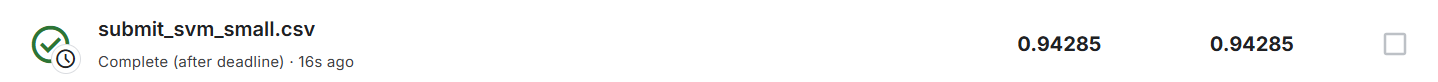

**Comparing Supervised Approach with the Unsupervised Approach**

As shown in the above results, when using the full amount of training data, SVM (supervised learning) model has a higher accuracy than the NMF (unsupervised learning) model. When using the same smaller amount (10%) of training data, SVM model still has a higher accuracy than the NMF model.

When the amount of training data dropped from 80% to 10%, the SVM model accuracy decreased from ~98% to ~94% (decrease ~5%).

When the same decrease occurred, the NMF model accuracy decreased from ~95% to ~87% (decrease ~8%).

This suggests that the SVM model is slightly more efficient, as the smaller decrease in accuracy indicates it is able to achieve a closer performance with less data, compared to the NMF model. Both models accuracies are comparable between training and test data, showing that they are not overfitting on the training data.

## References
* https://pythonspot.com/nltk-stop-words/
* https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* https://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.NMF.html